# 5. Modeling

This notebook focuses on building and evaluating models for sentiment analysis using Logistic Regression and Lexicon Based. The process includes loading the preprocessed data, splitting it into training and test sets, and vectorizing the text data using TF-IDF. We then train a logistic regression model on the training data and evaluate its performance using various metrics. The notebook concludes with saving the trained model, making it ready for deployment in future applications.

In [2]:
import re
import pandas as pd
import numpy as np
import datetime as dt
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

## Data

In [3]:
# Load dataframe
df = pd.read_csv('preprocessed_final.csv')
df

,created_at,Komentar,Sentiment,Score,month_year,clean_text,final_text,token,stop_text,stem_text
0,2023-03-08 04:10:06+00:00,"@ikanmokpoo mjb, mau transaksi apa Kak? Aku tr...",positive,5.016.244.649.887.080,2023-03,mjb transaksi kak transaksi bayar pake qris td...,mjb transaksi kak transaksi bayar pakai qris t...,"['mjb', 'transaksi', 'kak', 'transaksi', 'baya...","['transaksi', 'transaksi', 'bayar', 'qris', 'a...",transaksi transaksi bayar qris aman lancar jaya
1,2023-03-05 10:48:34+00:00,@BNICustomerCare ini kenapa dari dulu setiap m...,negative,989.467.442.035.675,2023-03,transaksi qris via bni ga ya min scan barcode ...,transaksi qris melalui bni tidak ya minimal sc...,"['transaksi', 'qris', 'melalui', 'bni', 'tidak...","['transaksi', 'qris', 'minimal', 'scan', 'barc...",transaksi qris minimal scan barcode otomatis c...
2,2023-03-17 04:21:57+00:00,"@tanyakanrl Keuntungannya praktis, tinggal swi...",positive,8.306.553.959.846.490,2023-03,keuntunganya praktis tingal swipe up homescren...,keuntunganya praktis tinggal swipe up homescre...,"['keuntunganya', 'praktis', 'tinggal', 'swipe'...","['keuntunganya', 'praktis', 'tinggal', 'swipe'...",keuntunganya praktis tinggal swipe homescrenlo...
3,2023-03-03 16:20:59+00:00,"@leeehovo @discountfess mau tanya kak, di pert...",neutral,9.959.661.960.601.800,2023-03,kak pertamina bayar mengunakan qris nga,kak pertamina bayar mengunakan qris tidak,"['kak', 'pertamina', 'bayar', 'mengunakan', 'q...","['pertamina', 'bayar', 'mengunakan', 'qris']",pertamina bayar mengunakan qris
4,2023-08-21 11:39:04+00:00,Udah 4x gw transaksi di alfa bahkan alfa yg ad...,negative,996.809.422.969.818,2023-08,udah gw transaksi alfa alfa yg beda kota gagal...,sudah saya transaksi alfa alfa yang beda kota ...,"['sudah', 'saya', 'transaksi', 'alfa', 'alfa',...","['transaksi', 'alfa', 'alfa', 'beda', 'kota', ...",transaksi alfa alfa beda kota gagal ros qris m...
...,...,...,...,...,...,...,...,...,...,...
7709,2024-06-24 04:55:11+00:00,haii haii kyu ada saldo receh nominal rahasia ...,neutral,9.753.036.499.023.430,2024-06,hai kyu saldo receh nominal rahasia ba qris ru...,hai ada saldo receh nominal rahasia akun bisni...,"['hai', 'ada', 'saldo', 'receh', 'nominal', 'r...","['nominal', 'rahasia', 'akun', 'bisnis', 'qris...",nominal rahasia akun bisnis qris rulesnya twet...
7710,2024-06-24 06:10:37+00:00,Banyak orang gatau kalau nyari duit itu segamp...,neutral,8.691.744.804.382.320,2024-06,orang gatau nyari duit segampang main slot gac...,orang tidak tahu mencari uang segampang main s...,"['orang', 'tidak', 'tahu', 'mencari', 'uang', ...","['orang', 'mencari', 'uang', 'segampang', 'mai...",orang cari uang gampang main gacor paris modal...
7711,2024-06-24 06:23:05+00:00,Di aku ready nih kak! Murce murce all e-wallet...,neutral,9.926.472.902.297.970,2024-06,ready nih kak murce al ewalet qris dm or wa,siap ini kak murah al ewalet qris direct messa...,"['siap', 'ini', 'kak', 'murah', 'al', 'ewalet'...","['murah', 'al', 'ewalet', 'qris', 'direct', 'm...",murah al ewalet qris direct message
7712,2024-06-24 07:09:20+00:00,mau netflix 1 bulan yg bs qris #zonauang,neutral,99.673.330.783.844,2024-06,netflix yg bs qris,netflix yang bisa qris,"['netflix', 'yang', 'bisa', 'qris']","['netflix', 'qris']",netflix qris


In [4]:
data = df[['stem_text', 'Sentiment']]

In [11]:
data

,stem_text,Sentiment
0,transaksi transaksi bayar qris aman lancar jaya,positive
1,transaksi qris minimal scan barcode otomatis c...,negative
2,keuntunganya praktis tinggal swipe homescrenlo...,positive
3,pertamina bayar mengunakan qris,neutral
4,transaksi alfa alfa beda kota gagal ros qris m...,negative
...,...,...
7709,nominal rahasia akun bisnis qris rulesnya twet...,neutral
7710,orang cari uang gampang main gacor paris modal...,neutral
7711,murah al ewalet qris direct message,neutral
7712,netflix qris,neutral


In [12]:
data['Sentiment'].value_counts()

neutral     5912
negative    1031
positive     771
Name: Sentiment, dtype: int64

In [13]:
data['Sentiment'].fillna(0, inplace=True)

C:\Users\Nab\AppData\Local\Temp\ipykernel_32532\2133464409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'].fillna(0, inplace=True)


## Changing sentiment values into numbers

In [5]:
data['Sentiment'] = data['Sentiment'].replace({'positive': 0, 'neutral': 1, 'negative': 2}).astype(int)

C:\Users\Nab\AppData\Local\Temp\ipykernel_17856\723592003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = data['Sentiment'].replace({'positive': 0, 'neutral': 1, 'negative': 2}).astype(int)


In [6]:
# Use .loc to modify the DataFrame
data.loc[:, 'Sentiment'] = data['Sentiment'].replace({'positive': 0, 'neutral': 1, 'negative': 2}).astype(int)

C:\Users\Nab\AppData\Local\Temp\ipykernel_17856\2950439130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Sentiment'] = data['Sentiment'].replace({'positive': 0, 'neutral': 1, 'negative': 2}).astype(int)


In [7]:
data['stem_text'] = data['stem_text'].fillna('')

C:\Users\Nab\AppData\Local\Temp\ipykernel_17856\2477820184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stem_text'] = data['stem_text'].fillna('')


## Split the text into X and y

In [8]:
X = data['stem_text']
y = data['Sentiment']

In [18]:
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=0.2,
#                                                     random_state=25)

## Vectorization

In [19]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False, max_features=200000)
# vectorizer.fit(X_train)
# print('No. of feature_words: ', len(vectorizer.get_feature_names_out()))

# X_train = vectorizer.transform(X_train)
# X_test = vectorizer.transform(X_test)

# Modeling Logistic Regression

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_model(X_train_tfidf, X_test_tfidf, y_train, y_test):
    # Train logistic regression model
    model = LogisticRegression()
    model.fit(X_train_tfidf, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_tfidf)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    return cm, report
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Test Size 10%
Confusion Matrix:
[[ 20  56   3]
 [  2 583  12]
 [  0  62  34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.25      0.40        79
           1       0.83      0.98      0.90       597
           2       0.69      0.35      0.47        96

    accuracy                           0.83       772
   macro avg       0.81      0.53      0.59       772
weighted avg       0.82      0.83      0.79       772





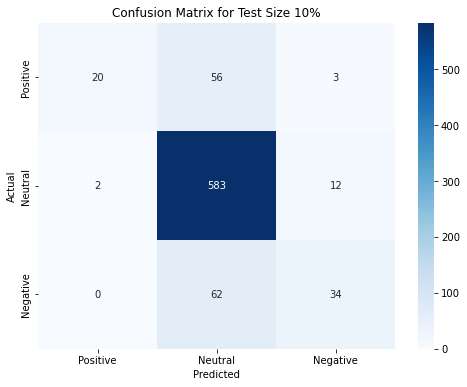

Test Size 20%
Confusion Matrix:
[[  39  119    5]
 [  11 1148   18]
 [   0  133   70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.24      0.37       163
           1       0.82      0.98      0.89      1177
           2       0.75      0.34      0.47       203

    accuracy                           0.81      1543
   macro avg       0.78      0.52      0.58      1543
weighted avg       0.81      0.81      0.78      1543





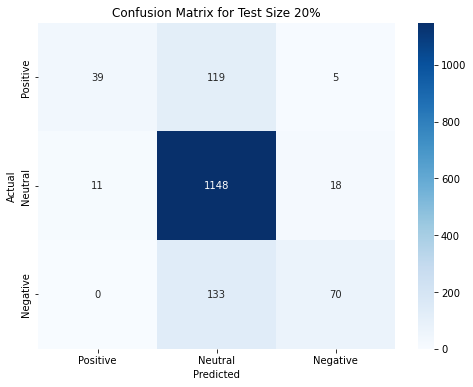

Test Size 30%
Confusion Matrix:
[[  48  173    9]
 [  13 1748   22]
 [   0  207   95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.21      0.33       230
           1       0.82      0.98      0.89      1783
           2       0.75      0.31      0.44       302

    accuracy                           0.82      2315
   macro avg       0.79      0.50      0.56      2315
weighted avg       0.81      0.82      0.78      2315





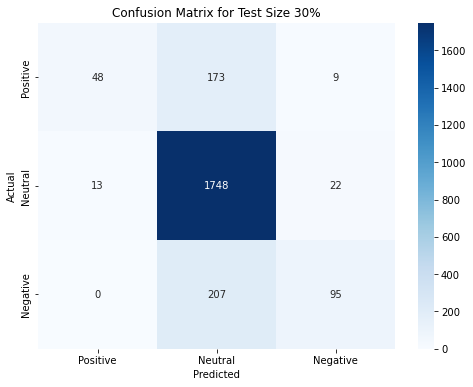

Test Size 40%
Confusion Matrix:
[[  66  229   10]
 [  22 2313   37]
 [   0  297  112]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.22      0.34       305
           1       0.81      0.98      0.89      2372
           2       0.70      0.27      0.39       409

    accuracy                           0.81      3086
   macro avg       0.76      0.49      0.54      3086
weighted avg       0.79      0.81      0.77      3086





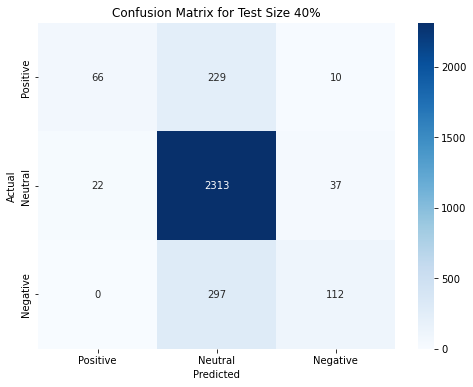

In [10]:
# Vectorize text data
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False, max_features=200000)
vectorizer.fit(X)
X_tfidf = vectorizer.transform(X)

# Define test sizes for the desired splits
test_sizes = [0.1, 0.2, 0.3, 0.4]
classes = ['Positive', 'Neutral', 'Negative']


# Evaluate the model with different splits
results = {}
for test_size in test_sizes:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=test_size, random_state=42)

    # Evaluate model
    cm, report = evaluate_model(X_train, X_test, y_train, y_test)

    # Store results
    results[test_size] = {
        'confusion_matrix': cm,
        'classification_report': report
    }

    # Print results for the current test size
    print(f"Test Size {test_size*100:.0f}%")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)
    print("\n")

    # Plot confusion matrix
    plot_confusion_matrix(cm, classes, title=f'Confusion Matrix for Test Size {test_size*100:.0f}%')


# Using The Best Size

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=25)


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False, max_features=200000)
vectorizer.fit(X_train)
print('No. of feature_words: ', len(vectorizer.get_feature_names_out()))

X_train_v = vectorizer.transform(X_train)
X_test_v = vectorizer.transform(X_test)

No. of feature_words:  8857


In [13]:
# Define class weights
class_weights = {
    0: 10,  # positive
    1: 1.30,  # neutral
    2: 7.49   # negative
}

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

logModel = LogisticRegression(multi_class='multinomial',
                              solver='lbfgs',
                              max_iter=1000,
                              penalty ='l2',
                              C=4,
                              class_weight=class_weights
                             )

# Train the model
logModel.fit(X_train_v, y_train)


LogisticRegression(C=4, class_weight={0: 10, 1: 1.3, 2: 7.49}, max_iter=1000,
                   multi_class='multinomial')

In [15]:
y_pred = logModel.predict(X_test_v)

Accuracy: 0.8121761658031088
Confusion Matrix:
[[ 49  18   6]
 [ 37 528  41]
 [  5  38  50]]


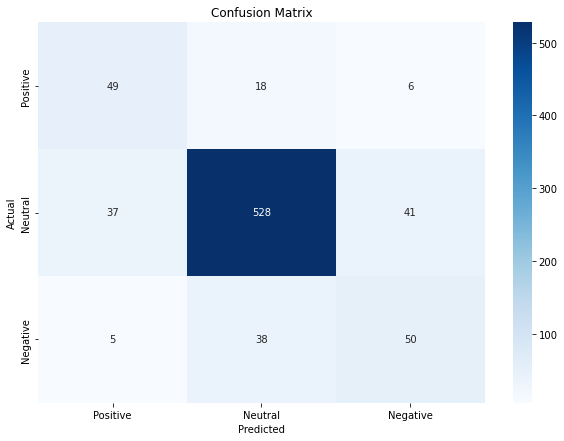

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.67      0.60        73
           1       0.90      0.87      0.89       606
           2       0.52      0.54      0.53        93

    accuracy                           0.81       772
   macro avg       0.65      0.69      0.67       772
weighted avg       0.82      0.81      0.82       772



In [16]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Neutral', 'Negative'], yticklabels=['Positive', 'Neutral', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Print classification report
print("Classification Report:")
print(report)


In [17]:
import numpy as np

def verify_labels(y_test, y_pred):
    # Check the types of y_test and y_pred
    print(f"Type of y_test: {type(y_test)}")
    print(f"Type of y_pred: {type(y_pred)}")
    
    # Convert to numpy arrays if they are not already
    if not isinstance(y_test, (list, np.ndarray)):
        y_test = np.array(y_test)
        print("Converted y_test to numpy array.")
    
    if not isinstance(y_pred, (list, np.ndarray)):
        y_pred = np.array(y_pred)
        print("Converted y_pred to numpy array.")
    
    # Check if the lengths of y_test and y_pred are the same
    if len(y_test) != len(y_pred):
        raise ValueError("The lengths of y_test and y_pred do not match")
    
    print("y_test and y_pred are valid for evaluation.")
    print(f"Length of y_test: {len(y_test)}")
    print(f"Length of y_pred: {len(y_pred)}")

# Use the verify_labels function
verify_labels(y_test, y_pred)


Type of y_test: <class 'pandas.core.series.Series'>
Type of y_pred: <class 'numpy.ndarray'>
Converted y_test to numpy array.
y_test and y_pred are valid for evaluation.
Length of y_test: 772
Length of y_pred: 772


Confusion Matrix:
[[ 49  18   6]
 [ 37 528  41]
 [  5  38  50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.67      0.60        73
           1       0.90      0.87      0.89       606
           2       0.52      0.54      0.53        93

    accuracy                           0.81       772
   macro avg       0.65      0.69      0.67       772
weighted avg       0.82      0.81      0.82       772


Metrics for each class:

Class '0':
Precision: 0.5384615384615384
Recall: 0.6712328767123288
F1-score: 0.5975609756097561
Support: 73
Manual calculations for class '0':
  TP (True Positive): 49
  FN (False Negative): 24
  FP (False Positive): 42
  TN (True Negative): 657

  Precision Calculation:
  Precision = TP / (TP + FP)
            = 49 / (49 + 42)
            = 49 / 91
            = 0.5384615384615384

  Recall Calculation:
  Recall = TP / (TP + FN)
         = 49 / (49 + 24)
         = 49 / 73
         = 0.6712328767123

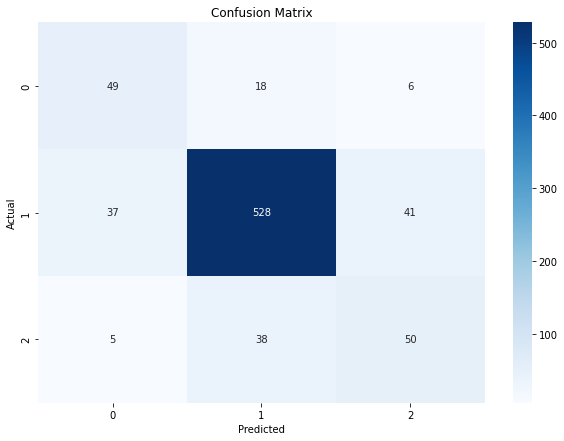

In [20]:
label_names=[0,1,2]
evaluate_model(y_test, y_pred,label_names)

In [ ]:
# # Buat DataFrame untuk hasil klasifikasi
# data = {
#     "No": list(range(1, len(y_test) + 1)),
#     "Komentar": X_test,  # Asumsikan X_test berisi teks komentar asli
#     "Label": y_test,
#     "Hasil Klasifikasi": y_pred
# }

# uji = pd.DataFrame(data)

# # Fungsi buat ngategorikan hasil klasifikasi
# def categorize(row):
#     if row["Label"] == 0:
#         if row["Hasil Klasifikasi"] == "POSITIVE":
#             return "TP"
#         else:
#             return "FN"
#     elif row["Label"] == 2:
#         if row["Hasil Klasifikasi"] == "NEGATIVE":
#             return "TN"
#         else:
#             return "FP"
#     elif row["Label"] ==1 :
#         if row["Hasil Klasifikasi"] == "NEUTRAL":
#             return "TN"
#         else:
#             return "FP"

# # Kategorikan hasil
# uji["Kategori"] = uji.apply(categorize, axis=1)

# # Buat kolom TP, FP, TN, FN berdasarkan kategori
# uji["TP"] = uji["Kategori"].apply(lambda x: 1 if x == "TP" else "")
# uji["FP"] = uji["Kategori"].apply(lambda x: 1 if x == "FP" else "")
# uji["TN"] = uji["Kategori"].apply(lambda x: 1 if x == "TN" else "")
# uji["FN"] = uji["Kategori"].apply(lambda x: 1 if x == "FN" else "")

# # Tampilkan DataFrame
# uji

In [21]:
import pandas as pd

# Data sample
data = {
    "No": list(range(1, len(y_test) + 1)),
    "Komentar": X_test,  # Asumsikan X_test berisi teks komentar asli
    "Label": y_test,
    "Hasil Klasifikasi": y_pred
}

uji = pd.DataFrame(data)

# Ganti label menjadi positif, netral, dan negatif
label_mapping = {0: "Positif", 1: "Netral", 2: "Negatif"}
uji["Label"] = uji["Label"].map(label_mapping)
uji["Hasil Klasifikasi"] = uji["Hasil Klasifikasi"].map(label_mapping)

# Fungsi buat ngategorikan hasil klasifikasi per kelas
def categorize(row, label):
    if row["Label"] == label:
        if row["Hasil Klasifikasi"] == label:
            return "TP"
        else:
            return "FN"
    else:
        if row["Hasil Klasifikasi"] == label:
            return "FP"
        else:
            return "TN"

# Kategorikan hasil untuk setiap kelas
labels = ["Positif", "Netral", "Negatif"]
for label in labels:
    col_name = f"Kategori_{label}"
    uji[col_name] = uji.apply(lambda row: categorize(row, label), axis=1)

# Buat kolom TP, FP, TN, FN berdasarkan kategori untuk setiap kelas
for label in labels:
    uji[f"TP_{label}"] = uji[f"Kategori_{label}"].apply(lambda x: 1 if x == "TP" else "")
    uji[f"FP_{label}"] = uji[f"Kategori_{label}"].apply(lambda x: 1 if x == "FP" else "")
    uji[f"TN_{label}"] = uji[f"Kategori_{label}"].apply(lambda x: 1 if x == "TN" else "")
    uji[f"FN_{label}"] = uji[f"Kategori_{label}"].apply(lambda x: 1 if x == "FN" else "")

# Tampilkan DataFrame
uji.head(20)


,No,Komentar,Label,Hasil Klasifikasi,Kategori_Positif,Kategori_Netral,Kategori_Negatif,TP_Positif,FP_Positif,TN_Positif,FN_Positif,TP_Netral,FP_Netral,TN_Netral,FN_Netral,TP_Negatif,FP_Negatif,TN_Negatif,FN_Negatif
195,1,cepat ketemu qris seabank ditemuin tipetipe li...,Positif,Netral,FN,FP,TN,,,,1,,1,,,,,1,
4325,2,barusan transaksi qris livin transaksi tunda s...,Negatif,Netral,TN,FP,FN,,,1,,,1,,,,,,1
349,3,transport murah ngutamain tempat jangkau jalur...,Positif,Positif,TP,TN,TN,1,,,,,,1,,,,1,
7707,4,rumit main aplikasi hasil uang paris gacor uan...,Netral,Positif,FP,FN,TN,,1,,,,,,1,,,1,
7088,5,inovasi bayar pajak kota bogor pakaiqris,Netral,Netral,TN,TP,TN,,,1,,1,,,,,,1,
303,6,riana phm keluh keluh transaksi qris sila tung...,Netral,Netral,TN,TP,TN,,,1,,1,,,,,,1,
6459,7,usung semangat ungul bi kenal qris riau,Netral,Positif,FP,FN,TN,,1,,,,,,1,,,1,
4783,8,selamat pagi sat transaksi qris cros border la...,Netral,Netral,TN,TP,TN,,,1,,1,,,,,,1,
1247,9,kenal transaksi qris nama belashop sfu,Netral,Netral,TN,TP,TN,,,1,,1,,,,,,1,
267,10,beli alfamart alfamart nya orang item hari lih...,Netral,Netral,TN,TP,TN,,,1,,1,,,,,,1,


In [22]:
# Simpan DataFrame ke CSV
uji.to_csv('hasil_klasifikasi_logistic.csv', index=False)

# Simpan DataFrame ke Excel
uji.to_excel('hasil_klasifikasi_logistic.xlsx', index=False)

In [ ]:
# from IPython.display import display
# display(uji)

In [23]:
# Filter untuk menampilkan hanya yang y_test nya NEGATIF
uji_negatif = uji[uji["Label"] == "Negatif"]

# Simpan DataFrame ke CSV
uji_negatif.to_csv('uji_logistic_negatif.csv', index=False)

# Simpan DataFrame ke Excel
uji_negatif.to_excel('uji_logistic_negatif.xlsx', index=False)
uji_negatif

,No,Komentar,Label,Hasil Klasifikasi,Kategori_Positif,Kategori_Netral,Kategori_Negatif,TP_Positif,FP_Positif,TN_Positif,FN_Positif,TP_Netral,FP_Netral,TN_Netral,FN_Netral,TP_Negatif,FP_Negatif,TN_Negatif,FN_Negatif
4325,2,barusan transaksi qris livin transaksi tunda s...,Negatif,Netral,TN,FP,FN,,,1,,,1,,,,,,1
2487,11,protes habis kemarin bayar qris kena potong ng...,Negatif,Negatif,TN,TN,TP,,,1,,,,1,,1,,,
3126,32,mandiri jam gin transaksi lelet transaksi qris...,Negatif,Negatif,TN,TN,TP,,,1,,,,1,,1,,,
5717,36,iya habis ngescan langsung close pas nunjukin ...,Negatif,Negatif,TN,TN,TP,,,1,,,,1,,1,,,
2376,43,jagat kasi banget sekolah bandung kanti bayar ...,Negatif,Negatif,TN,TN,TP,,,1,,,,1,,1,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,760,lambat verifikasi arsitektur kartu qris butuh ...,Negatif,Netral,TN,FP,FN,,,1,,,1,,,,,,1
2397,762,hokben blu bilang bayar qris pesan hoka hemat ...,Negatif,Netral,TN,FP,FN,,,1,,,1,,,,,,1
5732,763,aplikasi nya transaksi apa aplikasi bayar qris...,Negatif,Netral,TN,FP,FN,,,1,,,1,,,,,,1
5773,767,eri sayang jadi alami dasar qris terima transa...,Negatif,Negatif,TN,TN,TP,,,1,,,,1,,1,,,


In [24]:
# Filter untuk menampilkan hanya yang y_test nya NEGATIF
uji_pos = uji[uji["Label"] == "Positif"]

# Simpan DataFrame ke CSV
uji_pos.to_csv('uji_logistic_positif.csv', index=False)

# Simpan DataFrame ke Excel
uji_pos.to_excel('uji_logistic_positif.xlsx', index=False)
uji_pos

,No,Komentar,Label,Hasil Klasifikasi,Kategori_Positif,Kategori_Netral,Kategori_Negatif,TP_Positif,FP_Positif,TN_Positif,FN_Positif,TP_Netral,FP_Netral,TN_Netral,FN_Netral,TP_Negatif,FP_Negatif,TN_Negatif,FN_Negatif
195,1,cepat ketemu qris seabank ditemuin tipetipe li...,Positif,Netral,FN,FP,TN,,,,1,,1,,,,,1,
349,3,transport murah ngutamain tempat jangkau jalur...,Positif,Positif,TP,TN,TN,1,,,,,,1,,,,1,
1962,31,asyik gaes kahitna hadir konser ims infinite l...,Positif,Positif,TP,TN,TN,1,,,,,,1,,,,1,
1424,47,transaksi mah rumit qris gampang fitur donasi ...,Positif,Positif,TP,TN,TN,1,,,,,,1,,,,1,
7514,53,optimalisasi qris laku usaha hinga masyarakat ...,Positif,Positif,TP,TN,TN,1,,,,,,1,,,,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,661,kuliner hemat bayar scan qris octo mobile nikm...,Positif,Netral,FN,FP,TN,,,,1,,1,,,,,1,
4103,663,akulaku sedia fitur qris mudah penguna transak...,Positif,Netral,FN,FP,TN,,,,1,,1,,,,,1,
2969,680,transaksi gampang dompet ketingalan tinggal sc...,Positif,Positif,TP,TN,TN,1,,,,,,1,,,,1,
2047,751,ims surabaya takut kelaperan gais cashback tra...,Positif,Positif,TP,TN,TN,1,,,,,,1,,,,1,


In [25]:
# Filter untuk menampilkan hanya yang y_test nya NEGATIF
uji_net = uji[uji["Label"] == "Netral"]

# Simpan DataFrame ke CSV
uji_net.to_csv('uji_logistic_netral.csv', index=False)

# Simpan DataFrame ke Excel
uji_net.to_excel('uji_logistic_netral.xlsx', index=False)
uji_net

,No,Komentar,Label,Hasil Klasifikasi,Kategori_Positif,Kategori_Netral,Kategori_Negatif,TP_Positif,FP_Positif,TN_Positif,FN_Positif,TP_Netral,FP_Netral,TN_Netral,FN_Netral,TP_Negatif,FP_Negatif,TN_Negatif,FN_Negatif
7707,4,rumit main aplikasi hasil uang paris gacor uan...,Netral,Positif,FP,FN,TN,,1,,,,,,1,,,1,
7088,5,inovasi bayar pajak kota bogor pakaiqris,Netral,Netral,TN,TP,TN,,,1,,1,,,,,,1,
303,6,riana phm keluh keluh transaksi qris sila tung...,Netral,Netral,TN,TP,TN,,,1,,1,,,,,,1,
6459,7,usung semangat ungul bi kenal qris riau,Netral,Positif,FP,FN,TN,,1,,,,,,1,,,1,
4783,8,selamat pagi sat transaksi qris cros border la...,Netral,Netral,TN,TP,TN,,,1,,1,,,,,,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,766,susah beli tiket streaming show sr bantujokinj...,Netral,Netral,TN,TP,TN,,,1,,1,,,,,,1,
5603,768,sobat mohon maf ketidaknyamanan transaksi sat ...,Netral,Netral,TN,TP,TN,,,1,,1,,,,,,1,
5079,769,solusi sederhana lacak transaksi rp juta qris ...,Netral,Netral,TN,TP,TN,,,1,,1,,,,,,1,
3507,770,hobi kuliner mimin ikut angkat tangan pas bang...,Netral,Netral,TN,TP,TN,,,1,,1,,,,,,1,


# Handling Imbalance

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_v, y_train)

In [ ]:
# Train logistic regression model on the oversampled data
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = model.predict(X_test_v)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

**Saving Model & Tokenizer**

In [26]:
import os
import joblib
import pickle
# Get the current working directory
current_dir = os.getcwd()

# Define paths to save the model and vectorizer
model_path = os.path.join(current_dir, 'best_model.joblib')
vectorizer_path = os.path.join(current_dir, 'tokenizer.pkl')

# Save the model
joblib.dump(logModel, model_path)

# Save the vectorizer
pickle.dump(vectorizer, open(vectorizer_path, "wb"))

print(f"Model saved to {model_path}")
print(f"Vectorizer saved to {vectorizer_path}")

Model saved to C:\Users\Nab\jupyter project\sentiment qris\ta\best_model.joblib
Vectorizer saved to C:\Users\Nab\jupyter project\sentiment qris\ta\tokenizer.pkl


In [27]:
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# **Lexicon Based Method**

In [28]:
lexicon_positive = dict()
import csv
with open('lexicon_positive_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon_negative_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_negative[row[0]] = int(row[1])

In [29]:
def sentiment_analysis_lexicon_indonesia(text):
  score = 0
  for word_pos in text:
    if (word_pos in lexicon_positive):
      score = score + lexicon_positive[word_pos]
  for word_neg in text:
    if (word_neg in lexicon_negative):
      score = score + lexicon_negative[word_neg]
  polarity=''
  if (score > 0):
    polarity = 'positive'
  elif (score < 0):
    polarity = 'negative'
  else:
    polarity = 'neutral'

  return score, polarity

### All Data

In [30]:
df['prepos_text'] = df.stem_text.str.split()
df

,created_at,Komentar,Sentiment,Score,month_year,clean_text,final_text,token,stop_text,stem_text,prepos_text
0,2023-03-08 04:10:06+00:00,"@ikanmokpoo mjb, mau transaksi apa Kak? Aku tr...",positive,5.016.244.649.887.080,2023-03,mjb transaksi kak transaksi bayar pake qris td...,mjb transaksi kak transaksi bayar pakai qris t...,"['mjb', 'transaksi', 'kak', 'transaksi', 'baya...","['transaksi', 'transaksi', 'bayar', 'qris', 'a...",transaksi transaksi bayar qris aman lancar jaya,"[transaksi, transaksi, bayar, qris, aman, lanc..."
1,2023-03-05 10:48:34+00:00,@BNICustomerCare ini kenapa dari dulu setiap m...,negative,989.467.442.035.675,2023-03,transaksi qris via bni ga ya min scan barcode ...,transaksi qris melalui bni tidak ya minimal sc...,"['transaksi', 'qris', 'melalui', 'bni', 'tidak...","['transaksi', 'qris', 'minimal', 'scan', 'barc...",transaksi qris minimal scan barcode otomatis c...,"[transaksi, qris, minimal, scan, barcode, otom..."
2,2023-03-17 04:21:57+00:00,"@tanyakanrl Keuntungannya praktis, tinggal swi...",positive,8.306.553.959.846.490,2023-03,keuntunganya praktis tingal swipe up homescren...,keuntunganya praktis tinggal swipe up homescre...,"['keuntunganya', 'praktis', 'tinggal', 'swipe'...","['keuntunganya', 'praktis', 'tinggal', 'swipe'...",keuntunganya praktis tinggal swipe homescrenlo...,"[keuntunganya, praktis, tinggal, swipe, homesc..."
3,2023-03-03 16:20:59+00:00,"@leeehovo @discountfess mau tanya kak, di pert...",neutral,9.959.661.960.601.800,2023-03,kak pertamina bayar mengunakan qris nga,kak pertamina bayar mengunakan qris tidak,"['kak', 'pertamina', 'bayar', 'mengunakan', 'q...","['pertamina', 'bayar', 'mengunakan', 'qris']",pertamina bayar mengunakan qris,"[pertamina, bayar, mengunakan, qris]"
4,2023-08-21 11:39:04+00:00,Udah 4x gw transaksi di alfa bahkan alfa yg ad...,negative,996.809.422.969.818,2023-08,udah gw transaksi alfa alfa yg beda kota gagal...,sudah saya transaksi alfa alfa yang beda kota ...,"['sudah', 'saya', 'transaksi', 'alfa', 'alfa',...","['transaksi', 'alfa', 'alfa', 'beda', 'kota', ...",transaksi alfa alfa beda kota gagal ros qris m...,"[transaksi, alfa, alfa, beda, kota, gagal, ros..."
...,...,...,...,...,...,...,...,...,...,...,...
7709,2024-06-24 04:55:11+00:00,haii haii kyu ada saldo receh nominal rahasia ...,neutral,9.753.036.499.023.430,2024-06,hai kyu saldo receh nominal rahasia ba qris ru...,hai ada saldo receh nominal rahasia akun bisni...,"['hai', 'ada', 'saldo', 'receh', 'nominal', 'r...","['nominal', 'rahasia', 'akun', 'bisnis', 'qris...",nominal rahasia akun bisnis qris rulesnya twet...,"[nominal, rahasia, akun, bisnis, qris, rulesny..."
7710,2024-06-24 06:10:37+00:00,Banyak orang gatau kalau nyari duit itu segamp...,neutral,8.691.744.804.382.320,2024-06,orang gatau nyari duit segampang main slot gac...,orang tidak tahu mencari uang segampang main s...,"['orang', 'tidak', 'tahu', 'mencari', 'uang', ...","['orang', 'mencari', 'uang', 'segampang', 'mai...",orang cari uang gampang main gacor paris modal...,"[orang, cari, uang, gampang, main, gacor, pari..."
7711,2024-06-24 06:23:05+00:00,Di aku ready nih kak! Murce murce all e-wallet...,neutral,9.926.472.902.297.970,2024-06,ready nih kak murce al ewalet qris dm or wa,siap ini kak murah al ewalet qris direct messa...,"['siap', 'ini', 'kak', 'murah', 'al', 'ewalet'...","['murah', 'al', 'ewalet', 'qris', 'direct', 'm...",murah al ewalet qris direct message,"[murah, al, ewalet, qris, direct, message]"
7712,2024-06-24 07:09:20+00:00,mau netflix 1 bulan yg bs qris #zonauang,neutral,99.673.330.783.844,2024-06,netflix yg bs qris,netflix yang bisa qris,"['netflix', 'yang', 'bisa', 'qris']","['netflix', 'qris']",netflix qris,"[netflix, qris]"


In [31]:
df['prepos_text'] = df['prepos_text'].fillna('')

In [32]:
results = df['prepos_text'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]
print(df['polarity'].value_counts())

negative    5583
positive    1604
neutral      527
Name: polarity, dtype: int64


In [33]:
df

,created_at,Komentar,Sentiment,Score,month_year,clean_text,final_text,token,stop_text,stem_text,prepos_text,polarity_score,polarity
0,2023-03-08 04:10:06+00:00,"@ikanmokpoo mjb, mau transaksi apa Kak? Aku tr...",positive,5.016.244.649.887.080,2023-03,mjb transaksi kak transaksi bayar pake qris td...,mjb transaksi kak transaksi bayar pakai qris t...,"['mjb', 'transaksi', 'kak', 'transaksi', 'baya...","['transaksi', 'transaksi', 'bayar', 'qris', 'a...",transaksi transaksi bayar qris aman lancar jaya,"[transaksi, transaksi, bayar, qris, aman, lanc...",10,positive
1,2023-03-05 10:48:34+00:00,@BNICustomerCare ini kenapa dari dulu setiap m...,negative,989.467.442.035.675,2023-03,transaksi qris via bni ga ya min scan barcode ...,transaksi qris melalui bni tidak ya minimal sc...,"['transaksi', 'qris', 'melalui', 'bni', 'tidak...","['transaksi', 'qris', 'minimal', 'scan', 'barc...",transaksi qris minimal scan barcode otomatis c...,"[transaksi, qris, minimal, scan, barcode, otom...",-4,negative
2,2023-03-17 04:21:57+00:00,"@tanyakanrl Keuntungannya praktis, tinggal swi...",positive,8.306.553.959.846.490,2023-03,keuntunganya praktis tingal swipe up homescren...,keuntunganya praktis tinggal swipe up homescre...,"['keuntunganya', 'praktis', 'tinggal', 'swipe'...","['keuntunganya', 'praktis', 'tinggal', 'swipe'...",keuntunganya praktis tinggal swipe homescrenlo...,"[keuntunganya, praktis, tinggal, swipe, homesc...",2,positive
3,2023-03-03 16:20:59+00:00,"@leeehovo @discountfess mau tanya kak, di pert...",neutral,9.959.661.960.601.800,2023-03,kak pertamina bayar mengunakan qris nga,kak pertamina bayar mengunakan qris tidak,"['kak', 'pertamina', 'bayar', 'mengunakan', 'q...","['pertamina', 'bayar', 'mengunakan', 'qris']",pertamina bayar mengunakan qris,"[pertamina, bayar, mengunakan, qris]",-2,negative
4,2023-08-21 11:39:04+00:00,Udah 4x gw transaksi di alfa bahkan alfa yg ad...,negative,996.809.422.969.818,2023-08,udah gw transaksi alfa alfa yg beda kota gagal...,sudah saya transaksi alfa alfa yang beda kota ...,"['sudah', 'saya', 'transaksi', 'alfa', 'alfa',...","['transaksi', 'alfa', 'alfa', 'beda', 'kota', ...",transaksi alfa alfa beda kota gagal ros qris m...,"[transaksi, alfa, alfa, beda, kota, gagal, ros...",-7,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7709,2024-06-24 04:55:11+00:00,haii haii kyu ada saldo receh nominal rahasia ...,neutral,9.753.036.499.023.430,2024-06,hai kyu saldo receh nominal rahasia ba qris ru...,hai ada saldo receh nominal rahasia akun bisni...,"['hai', 'ada', 'saldo', 'receh', 'nominal', 'r...","['nominal', 'rahasia', 'akun', 'bisnis', 'qris...",nominal rahasia akun bisnis qris rulesnya twet...,"[nominal, rahasia, akun, bisnis, qris, rulesny...",6,positive
7710,2024-06-24 06:10:37+00:00,Banyak orang gatau kalau nyari duit itu segamp...,neutral,8.691.744.804.382.320,2024-06,orang gatau nyari duit segampang main slot gac...,orang tidak tahu mencari uang segampang main s...,"['orang', 'tidak', 'tahu', 'mencari', 'uang', ...","['orang', 'mencari', 'uang', 'segampang', 'mai...",orang cari uang gampang main gacor paris modal...,"[orang, cari, uang, gampang, main, gacor, pari...",-2,negative
7711,2024-06-24 06:23:05+00:00,Di aku ready nih kak! Murce murce all e-wallet...,neutral,9.926.472.902.297.970,2024-06,ready nih kak murce al ewalet qris dm or wa,siap ini kak murah al ewalet qris direct messa...,"['siap', 'ini', 'kak', 'murah', 'al', 'ewalet'...","['murah', 'al', 'ewalet', 'qris', 'direct', 'm...",murah al ewalet qris direct message,"[murah, al, ewalet, qris, direct, message]",5,positive
7712,2024-06-24 07:09:20+00:00,mau netflix 1 bulan yg bs qris #zonauang,neutral,99.673.330.783.844,2024-06,netflix yg bs qris,netflix yang bisa qris,"['netflix', 'yang', 'bisa', 'qris']","['netflix', 'qris']",netflix qris,"[netflix, qris]",0,neutral


In [34]:
df['polarity'] = df['polarity'].replace({'positive': 0, 'neutral': 1, 'negative': 2}).astype(int)
df

,created_at,Komentar,Sentiment,Score,month_year,clean_text,final_text,token,stop_text,stem_text,prepos_text,polarity_score,polarity
0,2023-03-08 04:10:06+00:00,"@ikanmokpoo mjb, mau transaksi apa Kak? Aku tr...",positive,5.016.244.649.887.080,2023-03,mjb transaksi kak transaksi bayar pake qris td...,mjb transaksi kak transaksi bayar pakai qris t...,"['mjb', 'transaksi', 'kak', 'transaksi', 'baya...","['transaksi', 'transaksi', 'bayar', 'qris', 'a...",transaksi transaksi bayar qris aman lancar jaya,"[transaksi, transaksi, bayar, qris, aman, lanc...",10,0
1,2023-03-05 10:48:34+00:00,@BNICustomerCare ini kenapa dari dulu setiap m...,negative,989.467.442.035.675,2023-03,transaksi qris via bni ga ya min scan barcode ...,transaksi qris melalui bni tidak ya minimal sc...,"['transaksi', 'qris', 'melalui', 'bni', 'tidak...","['transaksi', 'qris', 'minimal', 'scan', 'barc...",transaksi qris minimal scan barcode otomatis c...,"[transaksi, qris, minimal, scan, barcode, otom...",-4,2
2,2023-03-17 04:21:57+00:00,"@tanyakanrl Keuntungannya praktis, tinggal swi...",positive,8.306.553.959.846.490,2023-03,keuntunganya praktis tingal swipe up homescren...,keuntunganya praktis tinggal swipe up homescre...,"['keuntunganya', 'praktis', 'tinggal', 'swipe'...","['keuntunganya', 'praktis', 'tinggal', 'swipe'...",keuntunganya praktis tinggal swipe homescrenlo...,"[keuntunganya, praktis, tinggal, swipe, homesc...",2,0
3,2023-03-03 16:20:59+00:00,"@leeehovo @discountfess mau tanya kak, di pert...",neutral,9.959.661.960.601.800,2023-03,kak pertamina bayar mengunakan qris nga,kak pertamina bayar mengunakan qris tidak,"['kak', 'pertamina', 'bayar', 'mengunakan', 'q...","['pertamina', 'bayar', 'mengunakan', 'qris']",pertamina bayar mengunakan qris,"[pertamina, bayar, mengunakan, qris]",-2,2
4,2023-08-21 11:39:04+00:00,Udah 4x gw transaksi di alfa bahkan alfa yg ad...,negative,996.809.422.969.818,2023-08,udah gw transaksi alfa alfa yg beda kota gagal...,sudah saya transaksi alfa alfa yang beda kota ...,"['sudah', 'saya', 'transaksi', 'alfa', 'alfa',...","['transaksi', 'alfa', 'alfa', 'beda', 'kota', ...",transaksi alfa alfa beda kota gagal ros qris m...,"[transaksi, alfa, alfa, beda, kota, gagal, ros...",-7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7709,2024-06-24 04:55:11+00:00,haii haii kyu ada saldo receh nominal rahasia ...,neutral,9.753.036.499.023.430,2024-06,hai kyu saldo receh nominal rahasia ba qris ru...,hai ada saldo receh nominal rahasia akun bisni...,"['hai', 'ada', 'saldo', 'receh', 'nominal', 'r...","['nominal', 'rahasia', 'akun', 'bisnis', 'qris...",nominal rahasia akun bisnis qris rulesnya twet...,"[nominal, rahasia, akun, bisnis, qris, rulesny...",6,0
7710,2024-06-24 06:10:37+00:00,Banyak orang gatau kalau nyari duit itu segamp...,neutral,8.691.744.804.382.320,2024-06,orang gatau nyari duit segampang main slot gac...,orang tidak tahu mencari uang segampang main s...,"['orang', 'tidak', 'tahu', 'mencari', 'uang', ...","['orang', 'mencari', 'uang', 'segampang', 'mai...",orang cari uang gampang main gacor paris modal...,"[orang, cari, uang, gampang, main, gacor, pari...",-2,2
7711,2024-06-24 06:23:05+00:00,Di aku ready nih kak! Murce murce all e-wallet...,neutral,9.926.472.902.297.970,2024-06,ready nih kak murce al ewalet qris dm or wa,siap ini kak murah al ewalet qris direct messa...,"['siap', 'ini', 'kak', 'murah', 'al', 'ewalet'...","['murah', 'al', 'ewalet', 'qris', 'direct', 'm...",murah al ewalet qris direct message,"[murah, al, ewalet, qris, direct, message]",5,0
7712,2024-06-24 07:09:20+00:00,mau netflix 1 bulan yg bs qris #zonauang,neutral,99.673.330.783.844,2024-06,netflix yg bs qris,netflix yang bisa qris,"['netflix', 'yang', 'bisa', 'qris']","['netflix', 'qris']",netflix qris,"[netflix, qris]",0,1


In [35]:
df['Sentiment'] = df['Sentiment'].replace({'positive': 0, 'neutral': 1, 'negative': 2}).astype(int)

Confusion Matrix:
[[ 209   30  532]
 [1246  446 4220]
 [ 149   51  831]]
Classification Report:
              precision    recall  f1-score   support

           0       0.13      0.27      0.18       771
           1       0.85      0.08      0.14      5912
           2       0.15      0.81      0.25      1031

    accuracy                           0.19      7714
   macro avg       0.38      0.38      0.19      7714
weighted avg       0.68      0.19      0.16      7714


Metrics for each class:

Class 'Positif':
Precision: 0.13029925187032418
Recall: 0.2710765239948119
F1-score: 0.17600000000000002
Support: 771
Manual calculations for class 'Positif':
  TP (True Positive): 209
  FN (False Negative): 562
  FP (False Positive): 1395
  TN (True Negative): 5548

  Precision Calculation:
  Precision = TP / (TP + FP)
            = 209 / (209 + 1395)
            = 209 / 1604
            = 0.13029925187032418

  Recall Calculation:
  Recall = TP / (TP + FN)
         = 209 / (209 + 562)
     

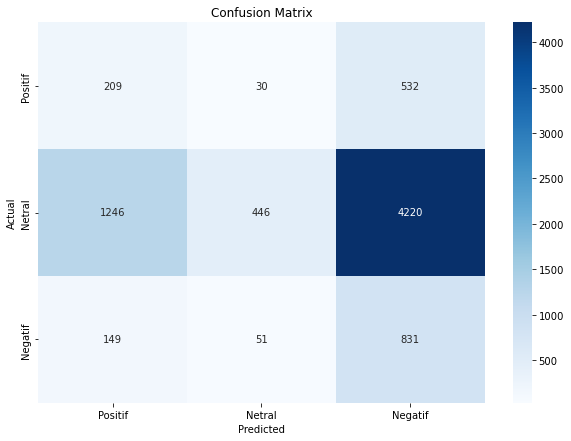

In [36]:
label_names = ['Positif', 'Netral', 'Negatif']
evaluate_model(df['Sentiment'], df['polarity'],label_names)

## Testing Data 

In [37]:
tokens = X_test.str.split()
tokens

195     [cepat, ketemu, qris, seabank, ditemuin, tipet...
4325    [barusan, transaksi, qris, livin, transaksi, t...
349     [transport, murah, ngutamain, tempat, jangkau,...
7707    [rumit, main, aplikasi, hasil, uang, paris, ga...
7088      [inovasi, bayar, pajak, kota, bogor, pakaiqris]
                              ...                        
5603    [sobat, mohon, maf, ketidaknyamanan, transaksi...
5079    [solusi, sederhana, lacak, transaksi, rp, juta...
3507    [hobi, kuliner, mimin, ikut, angkat, tangan, p...
3035    [pekan, qris, nasional, pqn, giat, diselengara...
7501    [jago, qris, transaksi, qris, biar, metrik, mo...
Name: stem_text, Length: 772, dtype: object

In [38]:
# Terapkan fungsi sentiment_analysis_lexicon_indonesia pada setiap sampel
results = tokens.apply(sentiment_analysis_lexicon_indonesia)

# Pisahkan hasil menjadi dua daftar berbeda
polarity_scores, polarities = zip(*results)

# Ubah polarities menjadi Series agar bisa menggunakan value_counts
polarities_series = pd.Series(polarities)

# Hitung value_counts
polarity_counts = polarities_series.value_counts()

print(polarity_counts)

negative    558
positive    152
neutral      62
dtype: int64


In [39]:
# Buat DataFrame dari X_test
data_lexicon = pd.DataFrame({
    "text": X_test,
    "label asli": y_test,
    "tokens": tokens,
    "polarity_score": polarity_scores,
    "polarity": polarities
})

data_lexicon

,text,label asli,tokens,polarity_score,polarity
195,cepat ketemu qris seabank ditemuin tipetipe li...,0,"[cepat, ketemu, qris, seabank, ditemuin, tipet...",-5,negative
4325,barusan transaksi qris livin transaksi tunda s...,2,"[barusan, transaksi, qris, livin, transaksi, t...",0,neutral
349,transport murah ngutamain tempat jangkau jalur...,0,"[transport, murah, ngutamain, tempat, jangkau,...",6,positive
7707,rumit main aplikasi hasil uang paris gacor uan...,1,"[rumit, main, aplikasi, hasil, uang, paris, ga...",-2,negative
7088,inovasi bayar pajak kota bogor pakaiqris,1,"[inovasi, bayar, pajak, kota, bogor, pakaiqris]",4,positive
...,...,...,...,...,...
5603,sobat mohon maf ketidaknyamanan transaksi sat ...,1,"[sobat, mohon, maf, ketidaknyamanan, transaksi...",6,positive
5079,solusi sederhana lacak transaksi rp juta qris ...,1,"[solusi, sederhana, lacak, transaksi, rp, juta...",5,positive
3507,hobi kuliner mimin ikut angkat tangan pas bang...,1,"[hobi, kuliner, mimin, ikut, angkat, tangan, p...",-10,negative
3035,pekan qris nasional pqn giat diselengarakan ba...,1,"[pekan, qris, nasional, pqn, giat, diselengara...",-6,negative


In [40]:
data_lexicon['polarity'] = data_lexicon['polarity'].replace({'positive': 0, 'neutral': 1, 'negative': 2}).astype(int)

In [41]:
data_lexicon=pd.read_csv('data_lexicon_3.csv')
data_lexicon

,no,text,label asli,tokens,polarity_score,label asli.1,polarity
0,195,cepat ketemu qris seabank ditemuin tipetipe li...,0,"['cepat', 'ketemu', 'qris', 'seabank', 'ditemu...",5,0,0
1,4325,barusan transaksi qris livin transaksi tunda s...,2,"['barusan', 'transaksi', 'qris', 'livin', 'tra...",2,0,0
2,349,transport murah ngutamain tempat jangkau jalur...,0,"['transport', 'murah', 'ngutamain', 'tempat', ...",6,0,0
3,7707,rumit main aplikasi hasil uang paris gacor uan...,1,"['rumit', 'main', 'aplikasi', 'hasil', 'uang',...",-2,2,2
4,7088,inovasi bayar pajak kota bogor pakaiqris,1,"['inovasi', 'bayar', 'pajak', 'kota', 'bogor',...",0,1,1
...,...,...,...,...,...,...,...
767,5603,sobat mohon maf ketidaknyamanan transaksi sat ...,1,"['sobat', 'mohon', 'maf', 'ketidaknyamanan', '...",-6,2,2
768,5079,solusi sederhana lacak transaksi rp juta qris ...,1,"['solusi', 'sederhana', 'lacak', 'transaksi', ...",-1,1,1
769,3507,hobi kuliner mimin ikut angkat tangan pas bang...,1,"['hobi', 'kuliner', 'mimin', 'ikut', 'angkat',...",0,1,1
770,3035,pekan qris nasional pqn giat diselengarakan ba...,1,"['pekan', 'qris', 'nasional', 'pqn', 'giat', '...",0,1,1


Confusion Matrix:
[[ 43   3  27]
 [200 129 277]
 [ 23   3  67]]
Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.59      0.25        73
           1       0.96      0.21      0.35       606
           2       0.18      0.72      0.29        93

    accuracy                           0.31       772
   macro avg       0.43      0.51      0.30       772
weighted avg       0.79      0.31      0.33       772


Metrics for each class:

Class 'Positif':
Precision: 0.16165413533834586
Recall: 0.589041095890411
F1-score: 0.25368731563421826
Support: 73
Manual calculations for class 'Positif':
  TP (True Positive): 43
  FN (False Negative): 30
  FP (False Positive): 223
  TN (True Negative): 476

  Precision Calculation:
  Precision = TP / (TP + FP)
            = 43 / (43 + 223)
            = 43 / 266
            = 0.16165413533834586

  Recall Calculation:
  Recall = TP / (TP + FN)
         = 43 / (43 + 30)
         = 43 / 73
         

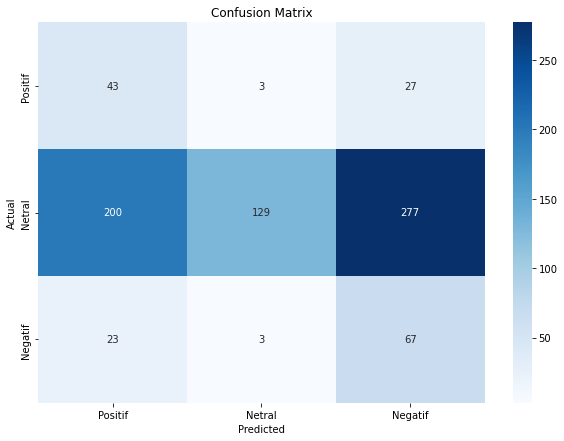

In [43]:
label_names = ['Positif', 'Netral', 'Negatif']
evaluate_model(data_lexicon['label asli'], data_lexicon['polarity'],label_names)

In [68]:
import pandas as pd

# Data sample
data = {
    "Komentar": X_test,  # Asumsikan X_test berisi teks komentar asli
    "Label": data_lexicon['label asli'],
    "Hasil Klasifikasi": data_lexicon['polarity']
}

uji_lexicon = pd.DataFrame(data)

# Fungsi buat ngategorikan hasil klasifikasi per kelas
def categorize(row, label):
    if row["Label"] == label:
        if row["Hasil Klasifikasi"] == label:
            return "TP"
        else:
            return "FN"
    else:
        if row["Hasil Klasifikasi"] == label:
            return "FP"
        else:
            return "TN"

# Kategorikan hasil untuk setiap kelas
labels = [0, 1, 2]
for label in labels:
    col_name = f"Kategori_{label}"
    uji_lexicon[col_name] = uji_lexicon.apply(lambda row: categorize(row, label), axis=1)

# Buat kolom TP, FP, TN, FN berdasarkan kategori untuk setiap kelas
for label in labels:
    uji_lexicon[f"TP_{label}"] = uji_lexicon[f"Kategori_{label}"].apply(lambda x: 1 if x == "TP" else "")
    uji_lexicon[f"FP_{label}"] = uji_lexicon[f"Kategori_{label}"].apply(lambda x: 1 if x == "FP" else "")
    uji_lexicon[f"TN_{label}"] = uji_lexicon[f"Kategori_{label}"].apply(lambda x: 1 if x == "TN" else "")
    uji_lexicon[f"FN_{label}"] = uji_lexicon[f"Kategori_{label}"].apply(lambda x: 1 if x == "FN" else "")

# Tampilkan DataFrame
uji_lexicon

,Komentar,Label,Hasil Klasifikasi,Kategori_0,Kategori_1,Kategori_2,TP_0,FP_0,TN_0,FN_0,TP_1,FP_1,TN_1,FN_1,TP_2,FP_2,TN_2,FN_2
0,transaksi transaksi bayar qris aman lancar jaya,0.0,0.0,TP,TN,TN,1,,,,,,1,,,,1,
1,NaN,2.0,0.0,FP,TN,FN,,1,,,,,1,,,,,1
2,NaN,0.0,0.0,TP,TN,TN,1,,,,,,1,,,,1,
3,NaN,1.0,2.0,TN,FN,FP,,,1,,,,,1,,1,,
4,NaN,1.0,1.0,TN,TP,TN,,,1,,1,,,,,,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7682,retwet terima readystock layout aespa hot mes ...,NaN,NaN,TN,TN,TN,,,1,,,,1,,,,1,
7683,kopi bikin pria loyo link shope,NaN,NaN,TN,TN,TN,,,1,,,,1,,,,1,
7694,terima sambutanya temu lain tag irfan hakim qr...,NaN,NaN,TN,TN,TN,,,1,,,,1,,,,1,
7707,rumit main aplikasi hasil uang paris gacor uan...,NaN,NaN,TN,TN,TN,,,1,,,,1,,,,1,


In [ ]:
# Ganti label menjadi positif, netral, dan negatif
label_mapping = {0: "Positif", 1: "Netral", 2: "Negatif"}
uji_lexicon["Label"] = uji_lexicon["Label"].map(label_mapping)
uji_lexicon["Hasil Klasifikasi"] = uji_lexicon["Hasil Klasifikasi"].map(label_mapping)
uji_lexicon

In [ ]:
uji_lexicon.to_csv("hasil_uji_lexicon.csv")